In [1]:
import pandas as pd
import numpy as np
from My_count import *

In [4]:
data1_true=pd.read_csv('/home/yazi/Documents/stage/data/data1_true.csv',delimiter=';',encoding='iso 8859-1')
data2_true=pd.read_csv('/home/yazi/Documents/stage/data/data2_true.csv',delimiter=';',encoding='iso 8859-1')
data1_false=pd.read_csv('/home/yazi/Documents/stage/data/data1_false.csv',delimiter=';',encoding='iso 8859-1')
data2_false=pd.read_csv('/home/yazi/Documents/stage/data/data2_false.csv',delimiter=';',encoding='iso 8859-1')
Data_Train=pd.concat([data1_true,data2_true,data1_false,data2_false],ignore_index=True)
Data_Train

,Ot,Dt,DUREE,NBTRAJTC,dist,parking
0,18300.0,19800.0,1500.0,1.0,20362.956563,1
1,34200.0,35340.0,1140.0,1.0,1941.648784,1
2,36000.0,37800.0,1800.0,2.0,23648.467181,1
3,27000.0,31800.0,4800.0,3.0,35474.638828,1
4,27000.0,32400.0,5400.0,3.0,35713.582850,1
5,30000.0,32400.0,2400.0,1.0,13400.000000,1
6,27900.0,33600.0,5700.0,3.0,32614.260685,1
7,48600.0,51300.0,2700.0,1.0,16319.620094,1
8,19800.0,22500.0,2700.0,1.0,19009.471324,1
9,30000.0,30300.0,300.0,2.0,100.000000,1


In [3]:
X = Data_Train.drop('parking', axis=1)
y = Data_Train['parking']

In [4]:
# from imblearn.over_sampling import SMOTE
# sm=SMOTE(random_state=42)
# X,y=sm.fit_resample(X,y)

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-1.5958114 , -1.66829122, -0.57514726, -0.89708632,  0.93431633],
       [-0.77721666, -0.86264201, -0.75408122, -0.89708632, -0.61836558],
       [-0.68454556, -0.73510681, -0.42603562,  0.23129809,  1.21124307],
       ...,
       [ 0.75185653,  0.88241283,  1.21419238,  0.23129809,  2.31540661],
       [ 1.55500608,  1.58230113,  0.17041092,  0.23129809,  2.29709521],
       [ 1.81757421,  1.78449109, -0.42603562, -0.89708632, -0.29098065]])

In [6]:
y=np.array(y.astype(float))
y

array([1., 1., 1., ..., 0., 0., 0.])

In [7]:
count(y)

{1.0: 1108, 0.0: 20411}

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [9]:
y_test=y_test.reshape([1,len(y_test)])
y_train=y_train.reshape([1,len(y_train)])

In [10]:
X_train=np.transpose(X_train)
X_test=np.transpose(X_test)

In [11]:
print('X_train shape is ',X_train.shape)
print('y_train shape is ',y_train.shape)
print('X_test shape is ',X_test.shape)
print('y_test shape is ',y_test.shape)

X_train shape is  (5, 17215)
y_train shape is  (1, 17215)
X_test shape is  (5, 4304)
y_test shape is  (1, 4304)


In [12]:
np.sum(y_test)+np.sum(y_train)

1108.0

# Neural Network

In [13]:
import tensorflow as tf

In [14]:
def create_placeholders(n_x,n_y):
    #n_x=5,n_y=1
    X=tf.placeholder(tf.float32,[n_x,None],name="X")
    Y=tf.placeholder(tf.float32,[n_y,None],name="Y")
    return X,Y

In [15]:
X,Y=create_placeholders(5,1)

In [16]:
X

<tf.Tensor 'X:0' shape=(5, ?) dtype=float32>

In [17]:
Y

<tf.Tensor 'Y:0' shape=(1, ?) dtype=float32>

In [18]:
def initialize_parameters():
    W1=tf.get_variable('W1',[4,5],initializer=tf.contrib.layers.xavier_initializer())
    b1=tf.get_variable('b1',[4,1],initializer=tf.zeros_initializer())
    W2=tf.get_variable('W2',[2,4],initializer=tf.contrib.layers.xavier_initializer())
    b2=tf.get_variable('b2',[2,1],initializer=tf.zeros_initializer())
    W3=tf.get_variable('W3',[1,2],initializer=tf.contrib.layers.xavier_initializer())
    b3=tf.get_variable('b3',[1,1],initializer=tf.zeros_initializer())
    
    parameters={'W1':W1,
                'b1':b1,
                'W2':W2,
                'b2':b2,
                'W3':W3,
                'b3':b3
               }
    return parameters

In [19]:
tf.reset_default_graph()
with tf.Session() as sess:
    parameters = initialize_parameters()
    print("W1 = " + str(parameters["W1"]))
    print("b1 = " + str(parameters["b1"]))
    print("W2 = " + str(parameters["W2"]))
    print("b2 = " + str(parameters["b2"]))
    print("W3 = " + str(parameters["W3"]))
    print("b3 = " + str(parameters["b3"]))

W0902 13:28:53.106558 140623744530240 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



W1 = <tf.Variable 'W1:0' shape=(4, 5) dtype=float32_ref>
b1 = <tf.Variable 'b1:0' shape=(4, 1) dtype=float32_ref>
W2 = <tf.Variable 'W2:0' shape=(2, 4) dtype=float32_ref>
b2 = <tf.Variable 'b2:0' shape=(2, 1) dtype=float32_ref>
W3 = <tf.Variable 'W3:0' shape=(1, 2) dtype=float32_ref>
b3 = <tf.Variable 'b3:0' shape=(1, 1) dtype=float32_ref>


In [20]:
def forward_propagation(X,parameters):
    """
    LINEAR -> RELU -> LINEAR ->RELU ->LINEAR -> Sigmoid

    in：
        X - data[5,none]
        parameters - :W,b

    return：
        Z2 - last linear

    """

    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    
    Z1 = tf.add(tf.matmul(W1,X),b1)        # Z1 = np.dot(W1, X) + b1
    A1 = tf.nn.relu(Z1)                    # A1 = relu(Z1)
    Z2 = tf.add(tf.matmul(W2, A1), b2)     # Z2 = np.dot(W2, a1) + b2
    A2 = tf.nn.relu(Z2)                    # A2 = relu(Z2)
    Z3 = tf.add(tf.matmul(W3, A2), b3)     # Z3 = np.dot(W3, a2) + b3
    

    return Z3

In [21]:
tf.reset_default_graph()
with tf.Session() as sess:
    X,Y = create_placeholders(5,1)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X,parameters)
    print("Z3 = " + str(Z3))

Z3 = Tensor("Add_2:0", shape=(1, ?), dtype=float32)


In [22]:
def compute_cost(Z3,Y):
    logits = tf.transpose(Z3) 
    labels = tf.transpose(Y)  
    cost=tf.reduce_mean(tf.nn.weighted_cross_entropy_with_logits(labels=Y,logits=Z3,pos_weight=18.4))
    return cost

In [23]:
tf.reset_default_graph()

with tf.Session() as sess:
    X,Y = create_placeholders(5,1)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X,parameters)
    cost = compute_cost(Z3,Y)
    print("cost = " + str(cost))


cost = Tensor("Mean:0", shape=(), dtype=float32)


In [24]:
from tensorflow.python.framework import ops
import matplotlib.pyplot as plt

In [25]:
def model(X_train,Y_train,X_test,Y_test,
        learning_rate=0.0001,num_epochs=10000,print_cost=True,is_plot=True):
    """
    实现一个2层的TensorFlow神经网络：LINEAR->RELU->LINEAR->Sigmoid

    参数：
        X_train - 训练集，维度为（输入大小（输入节点数量） = 12288, 样本数量 = 1080）
        Y_train - 训练集分类数量，维度为（输出大小(输出节点数量) = 6, 样本数量 = 1080）
        X_test - 测试集，维度为（输入大小（输入节点数量） = 12288, 样本数量 = 120）
        Y_test - 测试集分类数量，维度为（输出大小(输出节点数量) = 6, 样本数量 = 120）
        learning_rate - 学习速率
        num_epochs - 整个训练集的遍历次数
        mini_batch_size - 每个小批量数据集的大小
        print_cost - 是否打印成本，每100代打印一次
        is_plot - 是否绘制曲线图

    返回：
        parameters - 学习后的参数

    """
    ops.reset_default_graph()                #能够重新运行模型而不覆盖tf变量
    (n_x , m)  = X_train.shape               #获取输入节点数量和样本数
    n_y = Y_train.shape[0]                   #获取输出节点数量
    costs = []                               #成本集

    #给X和Y创建placeholder
    X,Y = create_placeholders(n_x,n_y)

    #初始化参数
    parameters = initialize_parameters()

    #前向传播
    Z3 = forward_propagation(X,parameters)

    #计算成本
    cost = compute_cost(Z3,Y)

    
    #反向传播，使用Adam优化
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

    #初始化所有的变量
    init_g = tf.global_variables_initializer()
    init_l = tf.local_variables_initializer()
    #开始会话并计算
    with tf.Session() as sess:
        #初始化
        sess.run(init_g)
        sess.run(init_l)
        #正常训练的循环
        for epoch in range(num_epochs):

            epoch_cost = 0  #每代的成本

            #数据已经准备好了，开始运行session
            _ , minibatch_cost = sess.run([optimizer,cost],feed_dict={X:X_train,Y:Y_train})

            #计算这个minibatch在这一代中所占的误差
            epoch_cost =  minibatch_cost

            #记录并打印成本
            ## 记录成本
            if epoch % 5 == 0:
                costs.append(epoch_cost)
                #是否打印：
                if print_cost and epoch % 100 == 0:
                        print("epoch = " + str(epoch) + "    epoch_cost = " + str(epoch_cost))

        #是否绘制图谱
        if is_plot:
            plt.plot(np.squeeze(costs))
            plt.ylabel('cost')
            plt.xlabel('iterations (per tens)')
            plt.title("Learning rate =" + str(learning_rate))
            plt.show()

        #保存学习后的参数
        parameters = sess.run(parameters)
        print("save the parameter to session.")
        
       
        #计算当前的预测结果
        predicted=tf.greater(tf.nn.sigmoid(Z3),0.85)
        predicted=tf.cast(predicted,"float")
        correct_prediction = tf.equal(tf.round(predicted),Y)

        #计算准确率
        accuracy = tf.reduce_mean(tf.cast(correct_prediction,"float"))

        print("train accuracy ：", accuracy.eval({X: X_train, Y: Y_train}))
        print("test accuracy:", accuracy.eval({X: X_test, Y: Y_test}))
        
       
        
        return parameters


epoch = 0    epoch_cost = 1.3228718
epoch = 100    epoch_cost = 1.3158748
epoch = 200    epoch_cost = 1.3097012
epoch = 300    epoch_cost = 1.3047608
epoch = 400    epoch_cost = 1.3000239
epoch = 500    epoch_cost = 1.2952789
epoch = 600    epoch_cost = 1.2905307
epoch = 700    epoch_cost = 1.2856079
epoch = 800    epoch_cost = 1.2806482
epoch = 900    epoch_cost = 1.2755977
epoch = 1000    epoch_cost = 1.2694293
epoch = 1100    epoch_cost = 1.2626652
epoch = 1200    epoch_cost = 1.2562128
epoch = 1300    epoch_cost = 1.2500445
epoch = 1400    epoch_cost = 1.2440051
epoch = 1500    epoch_cost = 1.2383066
epoch = 1600    epoch_cost = 1.2329125
epoch = 1700    epoch_cost = 1.2276732
epoch = 1800    epoch_cost = 1.2227988
epoch = 1900    epoch_cost = 1.2183279
epoch = 2000    epoch_cost = 1.214106
epoch = 2100    epoch_cost = 1.2098957
epoch = 2200    epoch_cost = 1.2056855
epoch = 2300    epoch_cost = 1.2016544
epoch = 2400    epoch_cost = 1.1978114
epoch = 2500    epoch_cost = 1.1940751

epoch = 20700    epoch_cost = 0.9601887
epoch = 20800    epoch_cost = 0.9601431
epoch = 20900    epoch_cost = 0.9600647
epoch = 21000    epoch_cost = 0.95995206
epoch = 21100    epoch_cost = 0.95987964
epoch = 21200    epoch_cost = 0.9598152
epoch = 21300    epoch_cost = 0.95975643
epoch = 21400    epoch_cost = 0.9597058
epoch = 21500    epoch_cost = 0.9596219
epoch = 21600    epoch_cost = 0.9595177
epoch = 21700    epoch_cost = 0.9594745
epoch = 21800    epoch_cost = 0.9594351
epoch = 21900    epoch_cost = 0.9594044
epoch = 22000    epoch_cost = 0.9593807
epoch = 22100    epoch_cost = 0.9593601
epoch = 22200    epoch_cost = 0.959336
epoch = 22300    epoch_cost = 0.95931643
epoch = 22400    epoch_cost = 0.9593008
epoch = 22500    epoch_cost = 0.959282
epoch = 22600    epoch_cost = 0.9592668
epoch = 22700    epoch_cost = 0.9592527
epoch = 22800    epoch_cost = 0.95922107
epoch = 22900    epoch_cost = 0.95920944
epoch = 23000    epoch_cost = 0.95918846
epoch = 23100    epoch_cost = 0.959

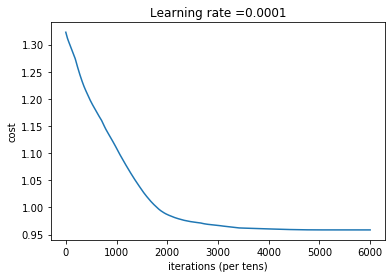

save the parameter to session.
train accuracy ： 0.92692417
test accuracy: 0.9219331


In [26]:
parameters=model(X_train,y_train,X_test,y_test,
        learning_rate=0.0001,num_epochs=30000,print_cost=True,is_plot=True)

# prediction

In [27]:
def predict(X, parameters):

    W1 = tf.convert_to_tensor(parameters["W1"])
    b1 = tf.convert_to_tensor(parameters["b1"])
    W2 = tf.convert_to_tensor(parameters["W2"])
    b2 = tf.convert_to_tensor(parameters["b2"])
    W3 = tf.convert_to_tensor(parameters["W3"])
    b3 = tf.convert_to_tensor(parameters["b3"])

    params = {"W1": W1,
              "b1": b1,
              "W2": W2,
              "b2": b2,
              "W3": W3,
              "b3": b3,
              
             }

    x=tf.placeholder(tf.float32,[5,None],name="x")

    z3 = forward_propagation_for_predict(x, params)
    predicted=tf.greater(tf.nn.sigmoid(z3),0.85)
    predicted=tf.cast(predicted,"float")
    p = tf.round(predicted)
    
    sess = tf.Session()
    prediction = sess.run(p, feed_dict = {x: X})

    return prediction

def forward_propagation_for_predict(X, parameters):
    """
    Implements the forward propagation for the model: LINEAR -> RELU -> LINEAR -> SOFTMAX

    Arguments:
    X -- input dataset placeholder, of shape (input size, number of examples)
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2",
                  the shapes are given in initialize_parameters
    Returns:
    Z2 -- the output of the last LINEAR unit
    """

    # Retrieve the parameters from the dictionary "parameters" 
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
                                                           # Numpy Equivalents:
    Z1 = tf.add(tf.matmul(W1, X), b1)                      # Z1 = np.dot(W1, X) + b1
    A1 = tf.nn.relu(Z1)                                    # A1 = relu(Z1)
    Z2 = tf.add(tf.matmul(W2, A1), b2)                     # Z2 = np.dot(W2, a1) + b2
    A2 = tf.nn.relu(Z2)                    # A2 = relu(Z2)
    Z3 = tf.add(tf.matmul(W3, A2), b3)     # Z3 = np.dot(W3, a2) + b3
  
    return Z3

In [28]:
file=pd.DataFrame()
for i in range(10):
    f1=pd.read_csv('/home/yazi/Documents/stage/data/car_afc_train/train'+str(i)+'_first.csv',delimiter=';',encoding='iso 8859-1',dtype=str)
    f2=pd.read_csv('/home/yazi/Documents/stage/data/car_afc_train/train'+str(i)+'_last.csv',delimiter=';',encoding='iso 8859-1',dtype=str)
    file=pd.concat([f1,f2,file],ignore_index=True)

In [29]:
X_Navigo=np.array(file.astype(float))
scaler = StandardScaler()
X_Navigo = scaler.fit_transform(X_Navigo)

In [30]:
X_Navigo=np.transpose(X_Navigo)


In [31]:
X_Navigo

array([[-1.10165604, -0.12573111, -1.09977777, ...,  0.7737926 ,
         0.78528316,  0.74142013],
       [-1.21512452,  1.1976657 ,  0.47995172, ...,  0.67654986,
         0.68837531,  0.64323392],
       [-0.17738113,  2.8932032 ,  3.51393893, ..., -0.26117054,
        -0.26117054, -0.26117054],
       [ 0.85520398,  3.28815296,  0.85520398, ...,  0.24696674,
         0.24696674,  0.24696674],
       [-0.11471561,  0.73442831, -0.38551987, ...,  2.43363096,
         2.43363096,  2.43363096]])

In [32]:
parameters

{'W1': array([[ 0.4940979 , -0.6410652 , -0.6272942 ,  0.13392799,  0.07239047],
        [ 1.2160814 , -1.1952878 , -0.8133616 ,  0.28103828, -0.18704274],
        [-0.4869977 ,  0.362084  , -0.14629129,  0.24659573, -1.5802517 ],
        [ 0.48343438, -0.676368  ,  0.17628296, -0.5514008 ,  1.124912  ]],
       dtype=float32), 'b1': array([[-0.3142327 ],
        [-0.3185538 ],
        [ 0.47711557],
        [ 0.35646266]], dtype=float32), 'W2': array([[ 0.1488838 , -0.28231135, -0.53409606, -0.6183441 ],
        [-0.97477275, -1.9557722 ,  1.259991  , -0.3134017 ]],
       dtype=float32), 'b2': array([[-0.04475863],
        [ 0.93750596]], dtype=float32), 'W3': array([[ 1.3431116, -1.9671211]], dtype=float32), 'b3': array([[1.8796451]], dtype=float32)}

In [33]:
result=predict(X_Navigo, parameters)

In [34]:
result

array([[0., 0., 0., ..., 1., 1., 1.]], dtype=float32)

In [35]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.]])

In [36]:
np.sum(result)

25064.0

In [37]:
result.shape

(1, 345710)

In [38]:
np.sum(result)/result.shape[1]

0.07250007231494605

In [39]:
from sklearn.metrics import classification_report, confusion_matrix
def show_result(y_test,y_pred):
    y_test=np.squeeze(y_test)
    y_pred=np.squeeze(y_pred)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

In [40]:
result=predict(X_train, parameters)
show_result(y_train,result)

[[15753   577]
 [  681   204]]
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96     16330
         1.0       0.26      0.23      0.24       885

    accuracy                           0.93     17215
   macro avg       0.61      0.60      0.60     17215
weighted avg       0.92      0.93      0.92     17215



In [41]:
result=predict(X_test, parameters)
show_result(y_test,result)

[[3922  159]
 [ 177   46]]
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96      4081
         1.0       0.22      0.21      0.21       223

    accuracy                           0.92      4304
   macro avg       0.59      0.58      0.59      4304
weighted avg       0.92      0.92      0.92      4304

